In [2]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Graph

# to perform stats tests
from scipy import stats

# all sklearn lib's functs I intend on using
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# to view Zach's threshold graph
import logistic_regression_util

#import all functions created in acquire & prepare
import prepare
import acquire

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read TELCO data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [ ]:
# initial data summarization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [5]:
df.shape

(7043, 24)

In [6]:
dfvc = df.isna().value_counts()
dfvc.to_frame().T

payment_type_id,False
internet_service_type_id,False
contract_type_id,False
customer_id,False
gender,False
senior_citizen,False
partner,False
dependents,False
tenure,False
phone_service,False
multiple_lines,False


<AxesSubplot:xlabel='monthly_charges', ylabel='Density'>

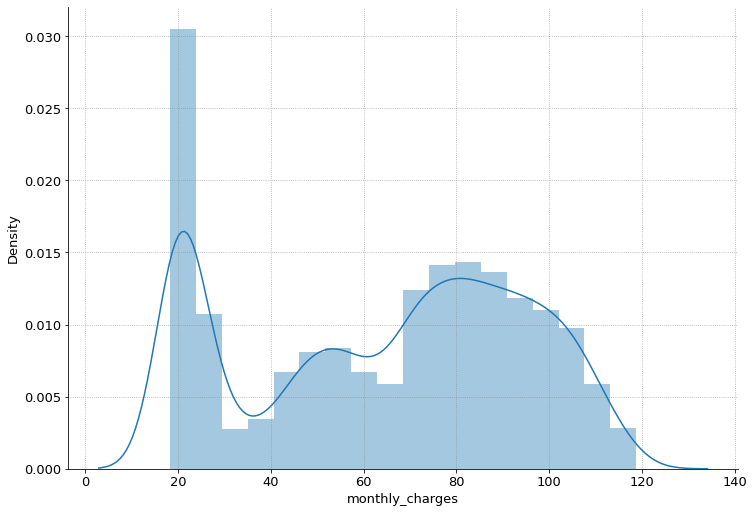

In [7]:
# Plot distributions of individual variables.
sns.distplot(df.monthly_charges)

<AxesSubplot:xlabel='senior_citizen', ylabel='Density'>

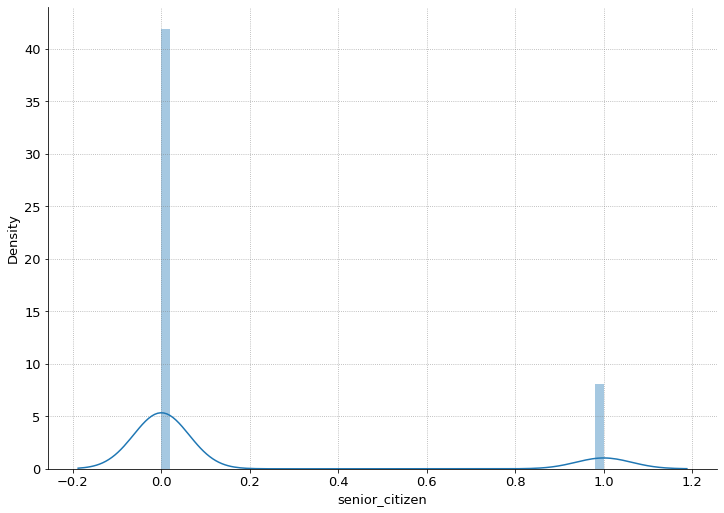

In [8]:
sns.distplot(df.senior_citizen)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

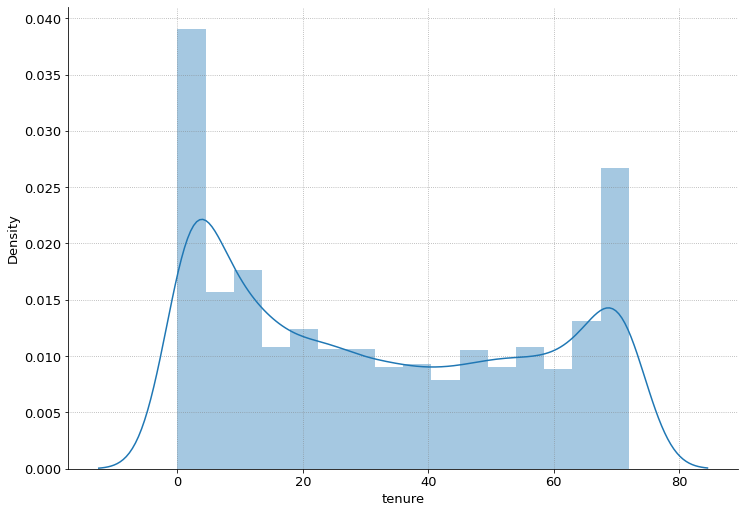

In [9]:
sns.distplot(df.tenure)

In [10]:
#df['total_charges'] = df['total_charges'].astype(str).astype(float)
df[["total_charges"]] = df[["total_charges"]].apply(pd.to_numeric)

ValueError: Unable to parse string " " at position 1878

ValueError: could not convert string to float: ''

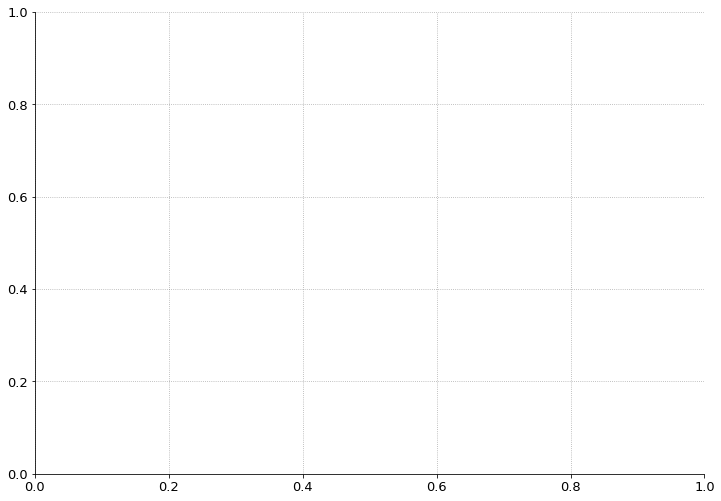

In [11]:
sns.distplot(df.total_charges)

In [12]:
df.total_charges.str.startswith(' ').value_counts()

False    7032
True       11
Name: total_charges, dtype: int64

In [4]:
# convert total_charges from obj to float
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
# convert 11 blank total_charges of newly est. custs to ZERO.
df.total_charges = df.total_charges.fillna(value=0)

In [14]:
df.total_charges.isna().value_counts()

False    7043
Name: total_charges, dtype: int64

In [15]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='total_charges', ylabel='Density'>

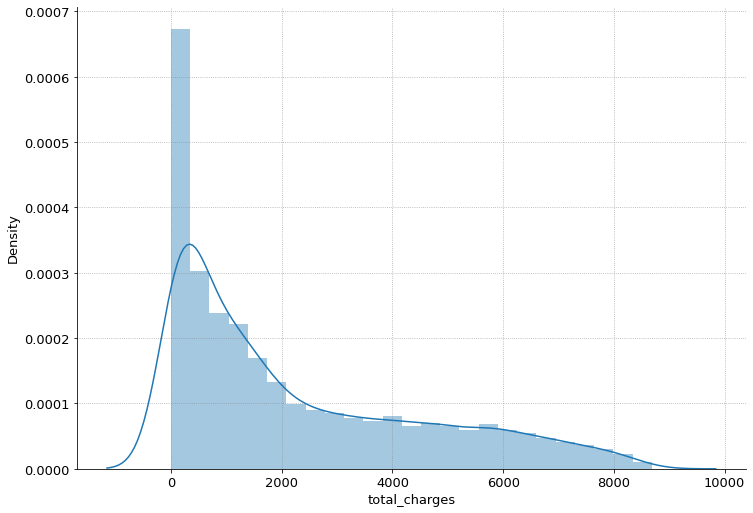

In [16]:
sns.distplot(df.total_charges)

In [ ]:
# baseline == 'No_churn'

In [ ]:
# clean data

I want to:
- drop:
    - payment_type_id
    - internet_service_type_id
    - contract_type_id
    
- encode:
    - partner
    - dependents
    - phone_service
    - paperless_billing
    - churn: 0=churn, 1=no_churn
    
- make dummies:
    - gender
    - multiple_lines
    - online_security
    - online_backup
    - device_protection
    - tech_support
    - streaming_tv
    - streaming_movies
    - contract_type
    - internet_service_type
    - payment_type
    
- rename col:
    - tenure:tenure_months
    
- replace:
    - Mailed check:mchk
    - Electronic check:echk
    - Credit card (automatic): acc
    - Bank transfer (automatic): abt

In [5]:
dropcols = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']

In [6]:
df.drop(columns= dropcols, inplace=True)

In [7]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [8]:
#df['gender'] = df['gender'].replace(['Female', 'Male'], [0, 1])

df.gender = df.gender.replace({'Female': 0, 'Male': 1})

In [9]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,No,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,0015-UOCOJ,0,1,No,No,7,Yes,No,Yes,No,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,0023-HGHWL,1,1,No,No,1,No,No phone service,No,No,...,No,No,No,Yes,25.1,25.10,Yes,Month-to-month,DSL,Electronic check
4,0032-PGELS,0,0,Yes,Yes,1,No,No phone service,Yes,No,...,No,No,No,No,30.5,30.50,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [10]:
df.partner = df.partner.replace({'No': 0, 'Yes': 1})

In [11]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,0,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [12]:
df.dependents = df.dependents.replace({'No': 0, 'Yes': 1})

In [13]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,0,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,0,1,9,Yes,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [15]:
df.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [16]:
df.phone_service = df.phone_service.replace({'No': 0, 'Yes': 1})

In [17]:
df.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0003-MKNFE,1,0,0,0,9,1,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
1,0013-MHZWF,0,0,0,1,9,1,No,No,No,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [18]:
df.multiple_lines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

In [19]:
df.multiple_lines = df.multiple_lines.replace({'No': 0, 'Yes': 1, 'No phone service': 3})